In [3]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2

# Simulamos importar ODE_euler (si lo has implementado)
# from src import ODE_euler

import numpy as np
import matplotlib.pyplot as plt

# Definición de la EDO: y' = -5y + 5t^2 + 2t
def f(t, y):
    return -5*y + 5*t**2 + 2*t

# Solución exacta: y(t) = t^2 + (1/3)e^(-5t)
def y_exacta(t):
    return t**2 + (1/3)*np.exp(-5*t)

# Método de Euler
def ODE_euler(f, y0, a, b, N):
    h = (b - a) / N
    t = np.linspace(a, b, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(N):
        y[i+1] = y[i] + h * f(t[i], y[i])
    return t, y


In [4]:
# Parámetros
a, b = 0, 1
y0 = 1/3
N = 10
h = (b - a) / N
print(f"h = {h}")


h = 0.1


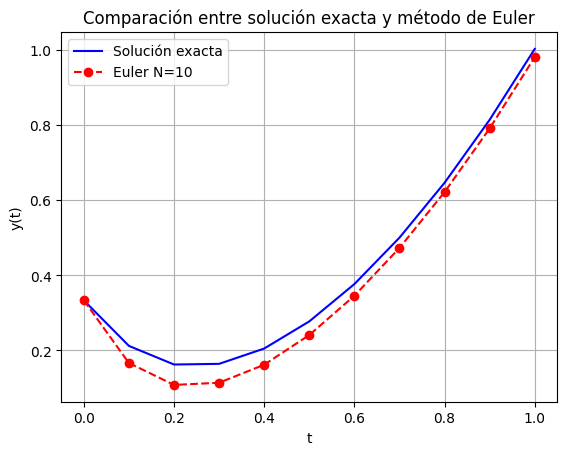

In [5]:
# Solución numérica con Euler
t_euler, y_euler = ODE_euler(f, y0, a, b, N)

# Solución real
y_real = y_exacta(t_euler)

# Gráfica
plt.plot(t_euler, y_real, label='Solución exacta', color='blue')
plt.plot(t_euler, y_euler, label='Euler N=10', linestyle='--', marker='o', color='red')
plt.title("Comparación entre solución exacta y método de Euler")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Error relativo promedio
def error_relativo_promedio(N):
    t, y_aprox = ODE_euler(f, y0, a, b, N)
    y_real = y_exacta(t)
    errores = np.abs((y_real - y_aprox) / y_real)
    return np.mean(errores)

# Cálculo para diferentes N
for N in [5, 10, 20]:
    e = error_relativo_promedio(N)
    print(f"e_N={N} = {e:.2e} => n = {int(np.floor(np.log10(e)))}")


e_N=5 = 2.80e-01 => n = -1
e_N=10 = 1.29e-01 => n = -1
e_N=20 = 6.31e-02 => n = -2
